# 第五章 神经网络

 - 5.1 sklearn多层感知机——手机市场价分类
 - 5.2 手动实现神经网络：线性回归
 - 5.3 手动实现神经网络：对数几率回归
 - 5.4 手动实现三层感知机——多分类

### sklearn多层感知机——手机市场价分类

实验内容：  
1. 此数据集不存在缺失值但存在不合逻辑的值，例如部分样本的手机屏幕宽度sc_w特征为0，要求使用数据集时首先进行清洗以剔除这些错误样本
2. 学习标准化处理的方法
3. 使用sklearn.neural_network.MLPClassifier完成手机市场价分类问题
4. 绘制学习率为3，1，0.1，0.01训练集损失函数的变化曲线

In [2]:
import numpy as np
import pandas as pd
# 使用pandas读取csv数据
data = pd.read_csv(r'../test1_0920/data/mobile_phone/train.csv', delimiter=',')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
data = data.drop(data[data['sc_w']==0].index)
print(len(data[data.sc_w == 0].index.tolist()))

0


##### 划分数据集

In [4]:
x_data = data.iloc[:, 0:20]
y_data = data['price_range']

In [5]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=33, shuffle=True);

#### 数据预处理

神经网络的训练方法一般是基于梯度的优化算法，如梯度下降，为了让这类算法能更好的优化神经网络，我们往往需要对数据集进行归一化，这里我们选择对数据进行标准化

$$X' = \frac{X - \bar{X}}{\mathrm{std}(X)}$$

其中，$\bar{X}$是均值，$\mathrm{std}$是标准差。减去均值可以让数据以0为中心，除以标准差可以让数据缩放到一个较小的范围内。这样可以使得梯度的下降方向更多样，同时缩小梯度的数量级，让学习变得稳定。  
首先需要对训练集进行标准化，针对每个特征求出其均值和标准差，然后用训练集的每个样本减去均值除以标准差，就得到了新的训练集。然后用测试集的每个样本，减去训练集的均值，除以训练集的标准差，完成对测试集的标准化。

In [6]:
from sklearn.preprocessing import StandardScaler
# 初始化一个标准化器的实例
standard = StandardScaler()
standard.fit(x_train);
x_train = standard.transform(x_train)
standard.fit(x_test)
x_test = standard.transform(x_test)
# YOUR CODE HERE

#### 引入模型

我们使用sklearn中自带的MLPClassifier，MLP是多层感知机(multi-layer perceptron)的简称。  
在训练的时候需要指定参数，这里我们需要设置的几个参数有：
1. solver: 'sgd'，这个参数的含义是，使用随机梯度下降作为优化算法
2. learning_rate: 'constant'，学习率固定，不衰减
3. momentum: 0，动量设置为0，这是随机梯度下降需要的一个参数，我们设置为0即可
4. max_iter: 设定最大迭代轮数，如果超过这个轮数还没有收敛，就停止训练，并抛出一个warning
5. learning_rate_init: 这个参数需要我们进行调整，这是学习率
6. random_state: 可选参数，等同于随机种子，保证随机数是固定不变的，从而结果可复现

In [7]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver = 'sgd', learning_rate = 'constant', momentum = 0, learning_rate_init = 0.1, max_iter = 500, random_state=32)
# 训练并测试模型
# YOUR CODE HERE
model.fit(x_train, y_train)

MLPClassifier(learning_rate_init=0.1, max_iter=500, momentum=0, random_state=32,
              solver='sgd')

#### 预测与评估

In [8]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE
y_hat = model.predict(x_test)
print(accuracy_score(y_test, y_hat))

0.9304029304029304


#### 绘制训练集损失函数值的变化曲线

我们可以通过model.loss_curve_获取模型在训练过程中，损失函数损失值的变化曲线

Text(0, 0.5, 'loss')

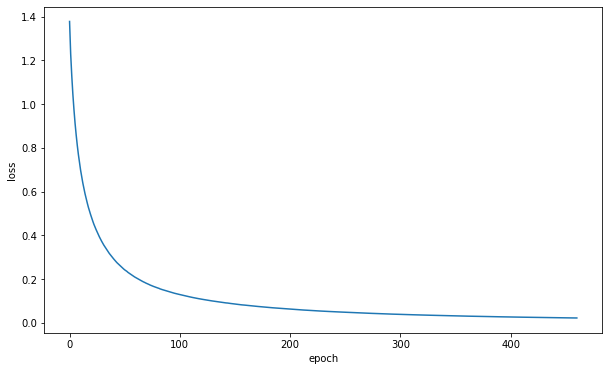

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(model.loss_curve_)
plt.xlabel('epoch')
plt.ylabel('loss')

## test：请你在一张图内，绘制出学习率为3，学习率为1，学习率为0.1，学习率为0.01，四个模型的损失函数变化曲线，最大迭代轮数为250轮。

提示：分别训练4个模型，然后在一张图中分别绘制4个模型的loss_curve_即可。

D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


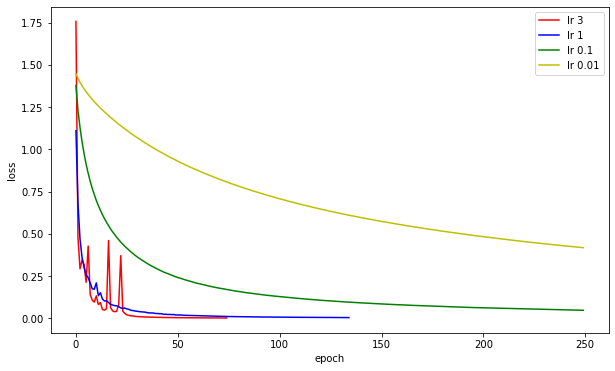

In [10]:
# YOUR CODE HERE
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

lr_list = [3, 1, 0.1, 0.01]
def mlp_plot(lr:list):
    color = ['r', 'b', 'g', 'y']
    plt.figure(figsize = (10, 6))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    for i in range(4):
        model = MLPClassifier(solver = 'sgd', learning_rate = 'constant', momentum = 0, learning_rate_init = lr[i], max_iter = 250, random_state=32)
    # 训练并测试模型
    # YOUR CODE HERE
        model.fit(x_train, y_train)
        plt.plot(model.loss_curve_, color=color[i])
    plt.legend([("lr "+ str(i)) for i in lr])

mlp_plot(lr_list)


### 手动实现神经网络：线性回归

实验内容：

使用advertising-dataset广告预测数据集，以TV, Radio, Newspaper三种特征作为模型的输入，Sales作为模型的输出
1. 学会梯度下降的基本思想
2. 学会使用梯度下降求解线性回归
3. 了解归一化处理的作用

## 线性回归

<img src="https://davidham3.github.io/blog/2018/09/11/logistic-regression/Fig0.png" width=300>

我们来完成最简单的线性回归，上图是一个最简单的神经网络，一个输入层，一个输出层，没有激活函数。  
我们记输入为$X \in \mathbb{R}^{n \times m}$，输出为$Z \in \mathbb{R}^{n}$。输入包含了$n$个样本，$m$个特征，输出是对这$n$个样本的预测值。  
输入层到输出层的权重和偏置，我们记为$W \in \mathbb{R}^{m}$和$b \in \mathbb{R}$。  
输出层没有激活函数，所以上面的神经网络的前向传播过程写为：

$$
Z = XW + b
$$

**注意：这里我们其实是做了广播，将$b$复制了$n-1$份后拼接成了维数为$n$的向量。**

我们使用均方误差作为模型的损失函数

$$
\mathrm{loss}(y, \hat{y}) = \frac{1}{n} \sum^n_{i=1}(y_i - \hat{y_i})^2
$$

我们通过调整参数$W$和$b$来降低均方误差，或者说是以降低均方误差为目标，学习参数$W$和参数$b$。当均方误差下降的时候，我们认为当前的模型的预测值$Z$与真值$y$越来越接近，也就是说模型正在学习如何让自己的预测值变得更准确。

在前面的课程中，我们已经学习了这种线性回归模型可以使用最小二乘法求解，最小二乘法在求解数据量较小的问题的时候很有效，但是最小二乘法的时间复杂度很高，一旦数据量变大，效率很低，实际应用中我们会使用梯度下降等基于梯度的优化算法来求解参数$W$和参数$b$。

## 梯度下降

梯度下降是一种常用的优化算法，通俗来说就是计算出参数的梯度（损失函数对参数的偏导数的导数值），然后将参数减去参数的梯度乘以一个很小的数（下面的公式），来改变参数，然后重新计算损失函数，再次计算梯度，再次进行调整，通过一定次数的迭代，参数就会收敛到最优点附近。

在我们的这个线性回归问题中，我们的参数是$W$和$b$，使用以下的策略更新参数：

$$
W := W - \alpha \frac{\partial \mathrm{loss}}{\partial W}
$$

$$
b := b - \alpha \frac{\partial \mathrm{loss}}{\partial b}
$$

其中，$\alpha$ 是学习率，一般设置为0.1，0.01等。

接下来我们会求解损失函数对参数的偏导数。

损失函数MSE记为：

$$
\mathrm{loss}(y, Z) = \frac{1}{n} \sum^n_{i = 1} (y_i - Z_i)^2
$$

其中，$Z \in \mathbb{R}^{n}$是我们的预测值，也就是神经网络输出层的输出值。这里我们有$n$个样本，实际上是将$n$个样本的预测值与他们的真值相减，取平方后加和。

我们计算损失函数对参数$W$的偏导数，根据链式法则，可以将偏导数拆成两项，分别求解后相乘：

**这里我们以矩阵的形式写出推导过程，感兴趣的同学可以尝试使用单个样本进行推导，然后推广到矩阵形式**

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial W} &= \frac{\partial \mathrm{loss}}{\partial Z} \frac{\partial Z}{\partial W}\\
&= - \frac{2}{n} X^\mathrm{T} (y - Z)\\
&= \frac{2}{n} X^\mathrm{T} (Z - y)
\end{aligned}$$

同理，求解损失函数对参数$b$的偏导数:

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial b} &= \frac{\partial \mathrm{loss}}{\partial Z} \frac{\partial Z}{\partial b}\\
&= - \frac{2}{n} \sum^n_{i=1}(y_i - Z_i)\\
&= \frac{2}{n} \sum^n_{i=1}(Z_i - y_i)
\end{aligned}$$

其中，$\frac{\partial \mathrm{loss}}{\partial W} \in \mathbb{R}^{m}$，$\frac{\partial \mathrm{loss}}{\partial b} \in \mathbb{R}$，求解得到的梯度的维度与参数一致。

完成上式两个梯度的计算后，就可以使用梯度下降法对参数进行更新了。

#### 导入数据

In [100]:
import numpy as np
import pandas as pd
# 使用pandas读取csv数据
# YOUR CODE HERE

data = pd.read_csv(r'../test1_0920/data/advertising/advertising.csv', delimiter=',')
# data = data.drop(data[data['sc_w']==0].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### 数据预处理

40%做测试集，60%做训练集

In [101]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
# print(len(data[data.sc_w == 0].index.tolist()))
x_data = data.iloc[:,0:3]
y_data = data['Sales']
# YOUR CODE HERE

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=32, shuffle=True);
from sklearn.preprocessing import StandardScaler
# 初始化一个标准化器的实例
# standard = StandardScaler()
# standard.fit(x_train);
# x_train = standard.transform(x_train)
# standard.fit(x_test)
# x_test = standard.transform(x_test)
# YOUR CODE HERE

In [102]:
print(x_data.shape)
print(y_data.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x_train))
x_train

(200, 3)
(200,)
(120, 3)
(80, 3)
(120,)
(80,)
<class 'pandas.core.frame.DataFrame'>


,TV,Radio,Newspaper
30,292.9,28.3,43.2
19,147.3,23.9,19.1
137,273.7,28.9,59.7
91,28.6,1.5,33.0
103,187.9,17.2,17.9
...,...,...,...
190,39.5,41.1,5.8
124,229.5,32.3,74.2
54,262.7,28.8,15.9
133,219.8,33.5,45.1


#### 前向传播

这里，我们要完成输入矩阵$\mathbf{X}$在神经网络中的计算，也就是完成 $z_i = \mathbf{x}_i\mathbf{w} + b$ 的计算。

In [103]:
def forward(X, W:np.ndarray, b):
    '''
    前向传播，计算Z = XW + b
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    Returns
    ----------
    Z: np.ndarray, shape = (n, )，线性组合后的值
    
    '''
    
    # 完成Z = XW + b的计算
    # YOUR CODE HERE
    if not isinstance(X, np.ndarray):
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()
    W = W.reshape((W.shape[0], -1))
    Z = X.dot(W) + b
    return Z.reshape(-1)

#### 参数初始化

In [104]:
def initialize(m):
    '''
    参数初始化，将W初始化成一个随机向量，b是一个长度为1的向量
    
    Parameters
    ----------
    m: int, 特征数
    
    Returns
    ----------
    W: np.ndarray, shape = (m, ), 参数W
    
    b: np.ndarray, shape = (1, ), 参数b
    
    '''
    
    # 指定随机种子，这样生成的随机数就是固定的了，这样就可以与下面的测试样例进行比对
    np.random.seed(33)
    
    W = np.random.normal(size = (m, )) * 0.01
    
    b = np.zeros((1, ))
    
    return W, b

In [105]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])
tmp = forward(x_train, Wt, bt)
print(tmp.mean()) # -0.1000


-1.2655271054744601


#### 损失函数

接下来编写损失函数，我们以均方误差(MSE)作为损失函数，需要大家实现MSE的计算：

$$
\mathrm{loss}(\mathbf{y}, \mathbf{z}) = \frac{1}{n} \sum^n_{i = 1} (y_i - z_i)^2
$$

In [106]:
def mse(y_true, y_pred):
    '''
    MSE，均方误差
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, )，真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    Returns
    ----------
    loss: float，损失值
    
    '''
    
    # 计算MSE
    # YOUR CODE HERE
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy()
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.to_numpy()
    y_true = y_true.reshape(-1)
    loss = (np.square(y_pred - y_true)).mean()
    return loss

In [107]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])

tmp = mse(y_train, forward(x_train, Wt, bt))
print(tmp) # 253.95978

292.9288340940308


array([[ 0.4329367 , -1.05654109, -1.17361671, ...,  0.55901699,
        -0.9569689 , -0.92923691],
       [ 1.19707248, -1.05654109, -0.19642308, ..., -1.78885438,
         1.04496604, -0.92923691],
       [ 1.2732552 , -1.05654109, -1.05146751, ...,  0.55901699,
        -0.9569689 ,  1.07615183],
       ...,
       [ 0.21131424, -1.05654109, -0.19642308, ...,  0.55901699,
         1.04496604, -0.92923691],
       [ 1.23631813,  0.94648472,  1.75796418, ..., -1.78885438,
         1.04496604,  1.07615183],
       [ 0.16976003,  0.94648472,  1.26936737, ..., -1.78885438,
        -0.9569689 , -0.92923691]])

#### 反向传播

这里我们要完成梯度的计算，也就是计算出损失函数对参数的偏导数的导数值：

$$
\frac{\partial \mathrm{loss}}{\partial \mathbf{w}} = \frac{2}{n} \mathbf{X}^\mathrm{T} (\mathbf{z} - \mathbf{y})
$$

$$
\frac{\partial \mathrm{loss}}{\partial b} = \frac{2}{n} \sum^n_{i=1}(z_i - y_i)
$$

In [108]:
def compute_gradient(X, Z, y_true):
    '''
    计算梯度
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据
    
    Z: np.ndarray, shape = (n, )，线性组合后的值
    
    y_true: np.ndarray, shape = (n, )，真值
    
    Returns
    ----------
    dW, np.ndarray, shape = (m, ), 参数W的梯度
    
    db, np.ndarray, shape = (1, ), 参数b的梯度
    
    '''
    
    n = len(y_true)
    
    # 计算W的梯度
    # YOUR CODE HERE
    
    # 计算b的梯度
    # YOUR CODE HERE
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy().reshape(-1)

    dW = 2*(X.T.dot((Z-y_true)))/len(y_true)
    db = 2*(Z-y_true).mean()
    return dW, db

#### 梯度下降

In [109]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])
Zt = forward(x_train, Wt, bt)
print(Zt.shape)
print(y_train.shape)
dWt, dbt = compute_gradient(x_train, Zt, y_train)
print(dWt.shape) # (3,)
print(dWt.mean()) # -2263.766
print(dbt) # -29.938

(120,)
(120,)
(3,)
-2431.302691785881
-32.26938754428225


这部分需要实现梯度下降的函数
$$
\mathbf{w} := \mathbf{w} - \alpha \frac{\partial \mathrm{loss}}{\partial \mathbf{w}}
$$

$$
b := b - \alpha \frac{\partial \mathrm{loss}}{\partial b}
$$

In [110]:
def update(dW, db, W, b, learning_rate):
    '''
    梯度下降，参数更新，不需要返回值，W和b实际上是以引用的形式传入到函数内部，
    函数内改变W和b会直接影响到它们本身，所以不需要返回值
    
    Parameters
    ----------
    dW, np.ndarray, shape = (m, ), 参数W的梯度
    
    db, np.ndarray, shape = (1, ), 参数b的梯度
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    learning_rate, float，学习率
    
    '''
    # 更新W
    # YOUR CODE HERE
    lr = learning_rate
    W -= lr*dW
    b -= lr*db

    # -= is at the source address, but is w =  w - sth., the np generated by the latter is at new address
    # thus the addresses of w and b is changed, can't be passed as reference
    # 更新b
    # YOUR CODE HERE

In [111]:
def backward(X, Z, y_true, W, b, learning_rate):
    '''
    使用compute_gradient和update函数，先计算梯度，再更新参数
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据
    
    Z: np.ndarray, shape = (n, )，线性组合后的值
    
    y_true: np.ndarray, shape = (n, )，真值
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    learning_rate, float，学习率
    
    '''
    # 计算参数的梯度
    # YOUR CODE HERE
    Z = Z.reshape(-1)
    dW, db = compute_gradient(X, Z, y_true)
    update(dW, db, W, b, learning_rate)

    # 更新参数
    # YOUR CODE HERE
    

#### 训练

In [112]:
def train(trainX, trainY, testX, testY, W, b, epochs, learning_rate = 0.01, verbose = False):
    '''
    训练，我们要迭代epochs次，每次迭代的过程中，做一次前向传播和一次反向传播，更新参数
    同时记录训练集和测试集上的损失值，后面画图用。然后循环往复，直到达到最大迭代次数epochs

    Parameters
    ----------
    trainX: np.ndarray, shape = (n, m), 训练集
    
    trainY: np.ndarray, shape = (n, ), 训练集标记
    
    testX: np.ndarray, shape = (n_test, m)，测试集
    
    testY: np.ndarray, shape = (n_test, )，测试集的标记
    
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    epochs: int, 要迭代的轮数
    
    learning_rate: float, default 0.01，学习率
    
    verbose: boolean, default False，是否打印损失值
    
    Returns
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值
    
    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值
    
    '''
    training_loss_list = []
    testing_loss_list = []
    
    for epoch in range(epochs):
        
        # 这里我们要将神经网络的输出值保存起来，因为后面反向传播的时候需要这个值
        Z = forward(trainX, W, b)
        
        # 计算训练集的损失值
        training_loss = mse(trainY, Z)

        # 计算测试集的损失值        
        # YOUR CODE HERE
        predict_test = forward(testX, W, b)
        testing_loss = mse(testY, predict_test)
        # 将损失值存起来
        training_loss_list.append(training_loss)
        # YOUR CODE HERE
        testing_loss_list.append(testing_loss)
        # 打印损失值，debug用
        if verbose:
            print('epoch %s training loss: %s'%(epoch+1, training_loss))
            print('epoch %s testing loss: %s'%(epoch+1, testing_loss))
            print()
        
        # 反向传播，参数更新
        # YOUR CODE HERE
        backward(trainX, Z, trainY, W, b, learning_rate)
    return training_loss_list, testing_loss_list

In [113]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])
print(Wt.mean())          # 0.00405243937693
print(bt.mean())          # 0.0

training_loss_list, testing_loss_list = train(x_train, y_train, x_test, y_test, Wt, bt, 2, learning_rate = 0.01, verbose = False)

print(training_loss_list) # [253.95978440919993, 79603189.50674823]
print(testing_loss_list)  # [274.49377910299654, 88378582.2080439]
print(Wt.mean())          # -12744.745217679281
print(bt.mean())          # -153.80590090906773

-0.011523506439235843
0.0
[292.9288340940308, 90978747.52364413]
[316.70056661583277, 101006163.39504072]
-13626.049844095069
-164.4656925210824


#### 检查

编写一个绘制损失值变化曲线的函数

一般我们通过绘制损失函数的变化曲线来判断模型的拟合状态。

一般来说，随着迭代轮数的增加，训练集的loss在下降，而测试集的loss在上升，这说明我们正在不断地让模型在训练集上表现得越来越好，在测试集上表现得越来越糟糕，这就是过拟合的体现。  

如果训练集loss和测试集loss共同下降，这就是我们想要的结果，说明模型正在很好的学习。  

In [114]:
def plot_loss_curve(training_loss_list, testing_loss_list):
    '''
    绘制损失值变化曲线
    
    Parameters
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值
    
    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值
    
    '''
    plt.figure(figsize = (10, 6))
    plt.plot(training_loss_list, label = 'training loss')
    plt.plot(testing_loss_list, label = 'testing loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

上面这些函数就是完成整个神经网络需要的函数了

|函数名|功能|
|-|-|
|initialize | 参数初始化|
|forward | 给定数据，计算神经网络的输出值|
|mse | 给定真值，计算神经网络的预测值与真值之间的差距|
|backward | 计算参数的梯度，并实现参数的更新|
|compute_gradient | 计算参数的梯度|
|update | 参数的更新|
|backward | 计算参数梯度，并且更新参数|
|train | 训练神经网络|
|plot_loss_curve | 绘制损失函数的变化曲线|

我们使用参数初始化函数和训练函数，完成神经网络的训练。

epoch 0, W: [-0.00318854 -0.01602981 -0.01535218]
epoch 0, b: [0.]

dWt: [-5476.3550995   -827.62642109  -989.92655477]
db: -32.26938754428225

epoch 1, W: [54.76036246  8.26023441  9.88391337]
epoch 1, b: [0.32269388]


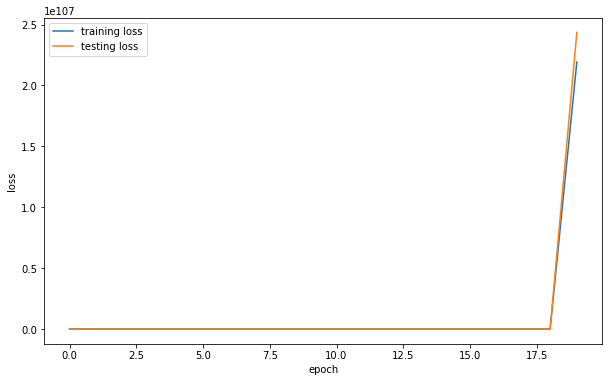

In [115]:
# 特征数m
m = x_train.shape[1]

# 参数初始化
W, b = initialize(m)

# 训练20轮，学习率为0.01
training_loss_list, testing_loss_list = train(x_train, y_train, x_test, y_test, W, b, 20, learning_rate = 0.01, verbose = False)

plot_loss_curve(training_loss_list, testing_loss_list)

# 测试样例
Wt, bt = initialize(x_train.shape[1])
print('epoch 0, W:', Wt)  # [-0.00348894  0.00983703  0.00580923]
print('epoch 0, b:', bt)  # [ 0.]
print()

Zt = forward(x_train, Wt, bt)
dWt, dbt = compute_gradient(x_train, Zt, y_train)
print('dWt:', dWt) # [ -4.18172940e+09  -2.19880296e+08  -1.94481031e+08]
print('db:', dbt) # -364308.555764
print()

update(dWt, dbt, Wt, bt, 0.01)
print('epoch 1, W:', Wt)  # [ 41817293.96016914   2198802.97412493   1944810.31544994]
print('epoch 1, b:', bt)  # [ 3643.08555764]

上述实验过程中实验数据没有经过标准化处理，下面加上标准化处理重做一次

#### 标准化处理

标准化处理和第一题一样

In [116]:
import numpy as np
import pandas as pd
# 使用pandas读取csv数据
# YOUR CODE HERE

data = pd.read_csv(r'../test1_0920/data/advertising/advertising.csv', delimiter=',')
# data = data.drop(data[data['sc_w']==0].index)
data.info()
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
# print(len(data[data.sc_w == 0].index.tolist()))
x_data = data.iloc[:,0:3]
y_data = data['Sales']
# YOUR CODE HERE

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=32, shuffle=True);
from sklearn.preprocessing import StandardScaler
# 初始化一个标准化器的实例
standard = StandardScaler()
standard.fit(x_train);
x_train = standard.transform(x_train)
standard.fit(x_test)
x_test = standard.transform(x_test)


def forward(X, W: np.ndarray, b):
    '''
    前向传播，计算Z = XW + b

    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据

    W: np.ndarray, shape = (m, )，权重

    b: np.ndarray, shape = (1, )，偏置

    Returns
    ----------
    Z: np.ndarray, shape = (n, )，线性组合后的值

    '''

    # 完成Z = XW + b的计算
    # YOUR CODE HERE
    if not isinstance(X, np.ndarray):
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()
    W = W.reshape((W.shape[0], -1))
    Z = X.dot(W) + b
    return Z.reshape(-1)


def initialize(m):
    '''
    参数初始化，将W初始化成一个随机向量，b是一个长度为1的向量

    Parameters
    ----------
    m: int, 特征数

    Returns
    ----------
    W: np.ndarray, shape = (m, ), 参数W

    b: np.ndarray, shape = (1, ), 参数b

    '''

    # 指定随机种子，这样生成的随机数就是固定的了，这样就可以与下面的测试样例进行比对
    np.random.seed(32)

    W = np.random.normal(size=(m,)) * 0.01

    b = np.zeros((1,))

    return W, b


def mse(y_true, y_pred):
    '''
    MSE，均方误差

    Parameters
    ----------
    y_true: np.ndarray, shape = (n, )，真值

    y_pred: np.ndarray, shape = (n, )，预测值

    Returns
    ----------
    loss: float，损失值

    '''

    # 计算MSE
    # YOUR CODE HERE
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy()
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.to_numpy()
    y_true = y_true.reshape(-1)
    loss = (np.square(y_pred - y_true)).mean()
    return loss


def compute_gradient(X, Z, y_true):
    '''
    计算梯度

    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据

    Z: np.ndarray, shape = (n, )，线性组合后的值

    y_true: np.ndarray, shape = (n, )，真值

    Returns
    ----------
    dW, np.ndarray, shape = (m, ), 参数W的梯度

    db, np.ndarray, shape = (1, ), 参数b的梯度

    '''

    n = len(y_true)

    # 计算W的梯度
    # YOUR CODE HERE

    # 计算b的梯度
    # YOUR CODE HERE
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy().reshape(-1)
    dW = 2 * (X.T.dot((Z - y_true))) / len(y_true)
    db = 2 * (Z - y_true).mean()
    return dW, db


def update(dW, db, W, b, learning_rate):
    '''
    梯度下降，参数更新，不需要返回值，W和b实际上是以引用的形式传入到函数内部，
    函数内改变W和b会直接影响到它们本身，所以不需要返回值

    Parameters
    ----------
    dW, np.ndarray, shape = (m, ), 参数W的梯度

    db, np.ndarray, shape = (1, ), 参数b的梯度

    W: np.ndarray, shape = (m, )，权重

    b: np.ndarray, shape = (1, )，偏置

    learning_rate, float，学习率

    '''
    # 更新W
    # YOUR CODE HERE
    lr = learning_rate
    W -= lr * dW
    b -= lr * db
    # 更新b
    # YOUR CODE HERE


def backward(X, Z, y_true, W, b, learning_rate):
    '''
    使用compute_gradient和update函数，先计算梯度，再更新参数

    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据

    Z: np.ndarray, shape = (n, )，线性组合后的值

    y_true: np.ndarray, shape = (n, )，真值

    W: np.ndarray, shape = (m, )，权重

    b: np.ndarray, shape = (1, )，偏置

    learning_rate, float，学习率

    '''
    # 计算参数的梯度
    # YOUR CODE HERE
    Z = Z.reshape(-1)
    dW, db = compute_gradient(X, Z, y_true)
    update(dW, db, W, b, learning_rate)

    # 更新参数
    # YOUR CODE HERE


def train(trainX, trainY, testX, testY, W, b, epochs, learning_rate=0.01, verbose=False):
    '''
    训练，我们要迭代epochs次，每次迭代的过程中，做一次前向传播和一次反向传播，更新参数
    同时记录训练集和测试集上的损失值，后面画图用。然后循环往复，直到达到最大迭代次数epochs

    Parameters
    ----------
    trainX: np.ndarray, shape = (n, m), 训练集

    trainY: np.ndarray, shape = (n, ), 训练集标记

    testX: np.ndarray, shape = (n_test, m)，测试集

    testY: np.ndarray, shape = (n_test, )，测试集的标记

    W: np.ndarray, shape = (m, )，参数W

    b: np.ndarray, shape = (1, )，参数b

    epochs: int, 要迭代的轮数

    learning_rate: float, default 0.01，学习率

    verbose: boolean, default False，是否打印损失值

    Returns
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值

    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值

    '''
    training_loss_list = []
    testing_loss_list = []

    for epoch in range(epochs):

        # 这里我们要将神经网络的输出值保存起来，因为后面反向传播的时候需要这个值
        Z = forward(trainX, W, b)

        # 计算训练集的损失值
        training_loss = mse(trainY, Z)

        # 计算测试集的损失值
        # YOUR CODE HERE
        predict_test = forward(testX, W, b)
        testing_loss = mse(testY, predict_test)
        # 将损失值存起来
        training_loss_list.append(training_loss)
        # YOUR CODE HERE
        testing_loss_list.append(testing_loss)
        # 打印损失值，debug用
        if verbose:
            print('epoch %s training loss: %s' % (epoch + 1, training_loss))
            print('epoch %s testing loss: %s' % (epoch + 1, testing_loss))
            print()

        # 反向传播，参数更新
        # YOUR CODE HERE
        backward(trainX, Z, trainY, W, b, learning_rate)
    return training_loss_list, testing_loss_list


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


重新训练模型，这次我们迭代40轮，学习率设置为0.1 ，打印损失值变化曲线 ，计算测试集上的MSE

test mse  2.4456374332752383e+108


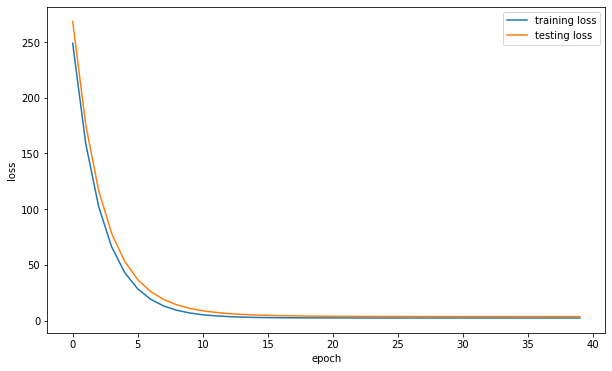

In [117]:
# YOUR CODE HERE
Wt, bt = initialize(x_train.shape[1])
training_loss_list, testing_loss_list = train(x_train, y_train, x_test, y_test, Wt, bt, 40, learning_rate = 0.1, verbose=False)
plot_loss_curve(training_loss_list, testing_loss_list)
print("test mse ", mse(forward(x_test, W, b), y_test))

# 手动实现神经网络：对数几率回归

实验内容：

使用手机市场分类数据集
1. 完成对数几率回归
2. 使用梯度下降求解模型参数
3. 绘制模型损失值的变化曲线
4. 调整学习率和迭代轮数，观察损失值曲线的变化
5. 按照给定的学习率和迭代轮数，初始化新的参数，绘制新模型在训练集和测试集上损失值的变化曲线，完成表格内精度的填写

## 激活函数

$$
\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

这个激活函数，会将输出层的神经元的输出值转换为一个 $(0, 1)$ 区间内的数。

因为是二分类问题，我们设类别为0和1，我们将输出值大于0.5的样本分为1类，输出值小于0.5的类分为0类。

## 前向传播

$$
Z = XW + b\\
\hat{y} = \sigma(Z)
$$

其中，$\hat{y} \in \mathbb{R}^{n}$为输出层的结果，$\sigma$为$\rm sigmoid$激活函数。

**注意：这里我们其实是做了广播，将$b$复制了$n-1$份后拼接成了维数为$n$的向量。**

所以对数几率回归就可以写为：

$$
\hat{y} = \frac{1}{1 + e^{-XW + b}}
$$

## 损失函数

使用对数损失函数，因为对数损失函数较其他损失函数有更好的性质，感兴趣的同学可以去查相关的资料。 

针对二分类问题的对数损失函数：

$$
\mathrm{loss}(y, \hat{y}) = - y \log{\hat{y}} - (1 - y) \log{(1 - \hat{y})}
$$

在这个对数几率回归中，我们的损失函数对所有样本取个平均值：

$$
\mathrm{loss}(y, \hat{y}) = - \frac{1}{n} \sum^n_{i = 1}[y_i \log{\hat{y_i}} + (1 - y_i) \log{(1 - \hat{y_i})}]
$$

**注意，这里我们的提到的$\log$均为$\ln$，在numpy中为**`np.log`。

因为我们的类别只有0和1，所以在这个对数损失函数中，要么前一项为0，要么后一项为0。

如果当前样本的类别为0，那么前一项就为0，损失函数变为 $- \log{(1 - \hat{y})}$ ，因为我们的预测值 $0 < \hat{y} < 1$ ，所以 $0 < 1 - \hat{y} < 1$ ，$- \log{(1 - \hat{y})} > 0$ ，为了降低损失值，模型需要让预测值 $\hat{y}$不断地趋于0。

同理，如果当前样本的类别为1，那么降低损失值就可以使模型的预测值趋于1。

## 参数更新

求得损失函数对参数的偏导数后，我们就可以使用**梯度下降**进行参数更新：

$$
W := W - \alpha \frac{\partial \mathrm{loss}}{\partial W}\\
b := b - \alpha \frac{\partial \mathrm{loss}}{\partial b}
$$

其中，$\alpha$ 是学习率，一般设置为0.1，0.01等。

经过**一定次数**的迭代后，参数会收敛至最优点。这种基于梯度的优化算法很常用，训练神经网络主要使用这类优化算法。

## 反向传播

我们使用梯度下降更新参数$W$和$b$。为此需要求得损失函数对参数$W$和$b$的偏导数，根据链式法则有：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial W} &= \frac{\partial \mathrm{loss}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Z} \frac{\partial Z}{\partial W}
\end{aligned}
$$

这里我们一项一项求，先求第一项：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial \hat{y}} = - \frac{1}{n} \sum^n_{i = 1} [\frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}}]
\end{aligned}
$$

第二项：

$$\begin{aligned}
\frac{\partial \hat{y}}{\partial Z} & = \frac{\partial (\frac{1}{1 + e^{-Z}})}{\partial Z}\\
& = \frac{e^{-Z}}{(1 + e^{-Z})^2}\\
& = \frac{e^{-Z}}{(1 + e^{-Z})} \frac{1}{(1 + e^{-Z})}\\
& = \frac{e^{-Z}}{(1 + e^{-Z})} (1 - \frac{e^{-Z}}{(1 + e^{-Z})})\\
& = \sigma(Z)(1 - \sigma(Z))
\end{aligned}
$$

第三项：

$$
\frac{\partial Z}{\partial W} = X^{\mathrm{T}}
$$

综上：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial W} &= \frac{\partial \mathrm{loss}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Z} \frac{\partial Z}{\partial W}\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\sigma(Z_i)(1 - \sigma(Z_i))] {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\hat{y_i}(1 - \hat{y_i})] {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} [y_i(1 - \hat{y_i}) - \hat{y_i}(1 - y_i)] {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} (y_i - y_i \hat{y_i} - \hat{y_i} + y_i \hat{y_i}) {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} (y_i - \hat{y_i}) {X_i}^{\mathrm{T}}\\
&= \frac{1}{n} [X^{\mathrm{T}}(\hat{y} - y)]
\end{aligned}
$$

同理，求$\rm loss$对$b$的偏导数：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial b} &= \frac{\partial \mathrm{loss}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Z} \frac{\partial Z}{\partial b}\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\sigma(Z_i)(1 - \sigma(Z_i))]\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\hat{y_i}(1 - \hat{y_i})]\\
&= - \frac{1}{n} \sum^n_{i = 1} [y_i(1 - \hat{y_i}) - \hat{y_i}(1 - y_i)]\\
&= - \frac{1}{n} \sum^n_{i = 1} (y_i - y_i \hat{y_i} - \hat{y_i} + y_i \hat{y_i})\\
&= \frac{1}{n} \sum^n_{i = 1} (\hat{y_i} - y_i)\\
\end{aligned}$$

## 对数几率回归代码

##### 导入数据集

In [1]:
import numpy as np
import pandas as pd
# 使用pandas读取csv数据
data = pd.read_csv(r'../test1_0920/data/mobile_phone/train.csv', delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##### 数据预处理

In [35]:
data = data.drop(data[data['sc_w']==0].index)
print(len(data[data.sc_w == 0].index.tolist()))
x_data = data.iloc[:, 0:20]
y_data = data['price_range']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=33, shuffle=True);
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(x_train);
x_train = standard.transform(x_train)
standard.fit(x_test)
x_test = standard.transform(x_test)


def classification(price):
    if price==2 or price==3:
        return 1
    else:
        return 0
y_test = y_test.apply(classification)
y_train = y_train.apply(classification)
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

0


In [36]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

##### 定义神经网络

##### 参数初始化

In [3]:
def initialize(m):
    '''
    初始化参数W和参数b
    
    Returns
    ----------
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    '''
    np.random.seed(33)
    W = np.random.normal(size = (m, )) * 0.01
    b = np.zeros((1, ))
    return W, b

##### 前向传播

首先计算$Z = XW + b$

In [4]:
def linear_combination(X, W, b):
    '''
    完成Z = XW + b的计算
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    Returns
    ----------
    Z: np.ndarray, shape = (n, )，线性组合后的值
    
    '''
    
    # YOUR CODE HERE
    if not isinstance(X, np.ndarray):
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()
    # W = W.reshape((W.shape[0], -1))
    Z = np.dot(X,W) + b
    # Z = 1 / (1+ np.exp(-Z))
    return Z.reshape(-1)

接下来实现激活函数$\rm sigmoid$

In [5]:
def my_sigmoid(x):
    '''
    simgoid 1 / (1 + exp(-x))
    
    Parameters
    ----------
    X: np.ndarray, 待激活的值
    
    '''
    # YOUR CODE HERE
    activations = 1/(1+np.exp(-x))
    return activations.reshape(-1)

在实现$\rm sigmoid$的时候，可能会遇到上溢(overflow)的问题，可以看到$\rm sigmoid$中有一个指数运算
$$
\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$
当$x$很大的时候，我们使用`numpy.exp(x)`会直接溢出

In [34]:
np.exp(1e56)

D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

虽说程序没有报错，只是抛出了warning，但还是应该解决一下。

解决这种问题的方法有很多，比如，我们可以将$\rm sigmoid$进行变换：

$$\begin{aligned}
\mathrm{sigmoid}(x) &= \frac{1}{1 + e^{-x}}\\
&= \frac{e^x}{1 + e^x}\\
&= \frac{1}{2} + \frac{1}{2} \mathrm{tanh}(\frac{x}{2})
\end{aligned}$$

其中，$\mathrm{tanh}(x) = \frac{\mathrm{sinh}(x)}{\mathrm{cosh}(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

转换成这种形式后，我们就可以直接利用`numpy.tanh`完成$\rm sigmoid$的计算，就不会产生上溢的问题了。

除此以外，最好的解决方法是使用scipy中的`expit`函数，完成$\rm sigmoid$的计算。我们现在做的都是神经网络底层相关的运算，很容易出现数值不稳定性相关的问题，最好的办法就是使用别人已经实现好的函数，这样就能减少我们很多的工作量，同时又快速地完成任务。

In [6]:
from scipy.special import expit
def sigmoid(X):

    return expit(X)

接下来完成整个前向传播的函数，也就是 $Z = XW+b$ 和 $\hat{y} = \mathrm{sigmoid}(Z)$

In [7]:
def forward_logesitcs(X, W, b):
    '''
    完成输入矩阵X到最后激活后的预测值y_pred的计算过程
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，数据，一行一个样本，一列一个特征
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    Returns
    ----------
    y_pred: np.ndarray, shape = (n, )，模型对每个样本的预测值
    
    '''
    # 求Z
                              # YOUR CODE HERE
    
    # 求激活后的预测值
                         # YOUR CODE HERE
    Z = linear_combination(X, W, b)
    y_pred = sigmoid(Z)
    return y_pred

接下来完成损失函数的编写，我们使用的是对数损失，这里需要注意的一个问题是：

$$
\mathrm{loss}(y, \hat{y}) = - \frac{1}{n}[ y \log{\hat{y}} + (1 - y) \log{(1 - \hat{y})}]
$$

在这个对数损失中，$\hat{y}$中不能有$0$和$1$，如果有$0$，那么损失函数中的前半部分，$\log{0}$就会出错，如果有$1$，那么后半部分$\log{(1-1)}$就会出错。

所以我们要先将$\hat{y}$中的$0$和$1$改变一下，把$0$变成一个比较小但是大于$0$的数，把$1$变成小于$1$但是足够大的数。使用`numpy.clip`函数就可以作到这点。

In [45]:
def logloss(y_true, y_pred):
    '''
    给定真值y，预测值y_hat，计算对数损失并返回
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, ), 真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    Returns
    ----------
    loss: float, 损失值
    
    '''
    # 下面这句话会把y_pred里面小于1e-10的数变成1e-10，大于1 - 1e-10的数变成1 - 1e-10
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy()
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.to_numpy()
    y_hat = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # 求解对数损失
    loss = np.where(y_true==1, np.log(y_hat), np.log(1-y_hat))
    loss = -loss.mean();
    return loss
    # loss = -1*( y_true * np.log(y_hat) + (1-y_true) * np.log(1-y_hat)).mean()
    # loss.astype(np.float32)
    # return loss

In [46]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])
logloss(y_train, forward_logesitcs(x_train, Wt, bt)) # 0.6895726

0.6904665391950447

In [44]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

#### 反向传播

我们接下来要完成损失函数对参数的偏导数的计算

In [47]:
def compute_gradient_logistics(y_true, y_pred, X):
    '''
    给定预测值y_pred，真值y_true，传入的输入数据X，计算损失函数对参数W的偏导数的导数值dW，以及对b的偏导数的导数值db
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, ), 真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    X: np.ndarray, shape = (n, m)，数据，一行一个样本，一列一个特征
    
    Returns
    ----------
    dW: np.ndarray, shape = (m, ), 损失函数对参数W的偏导数
    
    db: float, 损失函数对参数b的偏导数
    
    '''
    # 求损失函数对参数W的偏导数的导数值
                                            # YOUR CODE HERE
    dW =  (X.T).dot( y_pred - y_true)/ len(y_pred)
    # 求损失函数对参数b的偏导数的导数值

                                             # YOUR CODE HERE
    db = (y_pred-y_true ).mean()
    return dW, db

In [10]:
print(x_train.shape)
print(y_train.shape)


(1274, 20)
(1274,)


In [48]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])
dWt, dbt = compute_gradient_logistics(y_train, forward_logesitcs(x_train, Wt, bt), x_train)
print(dWt.shape) # (20, )
print(dWt.sum()) # -0.631848
print(dbt)       # -0.013736

# forward may be right
# todo

(20,)
-0.64060480170147
-0.002354451611689029


#### 参数更新
给定学习率，结合上一步求出的偏导数，完成梯度下降的更新公式

In [14]:
def update_logestics(W, b, dW, db, learning_rate):
    '''
    梯度下降，给定参数W，参数b，以及损失函数对他们的偏导数，使用梯度下降更新参数W和参数b
    
    Parameters
    ----------
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    dW: np.ndarray, shape = (m, ), 损失函数对参数W的偏导数
    
    db: float, 损失函数对参数b的偏导数
    
    learning_rate, float，学习率
    
    '''
    # 对参数W进行更新
    W -= learning_rate * dW
    b -= learning_rate * db
    # 对参数b进行更新
    # YOUR CODE HERE


    # 参数的顺序要重点关注


我们来完成整个反向传播和更新参数的函数

In [15]:
def backward_logestics(y_true, y_pred, X, W, b, learning_rate):
    '''
    反向传播，包含了计算损失函数对各个参数的偏导数的过程，以及梯度下降更新参数的过程
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, ), 真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    X: np.ndarray, shape = (n, m)，数据，一行一个样本，一列一个特征
    
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    dW: np.ndarray, shape = (m, ), 损失函数对参数W的偏导数
    
    db: float, 损失函数对参数b的偏导数
    
    learning_rate, float，学习率
    
    '''
    # 求参数W和参数b的梯度
    # YOUR CODE HERE
    dW, db = compute_gradient_logistics(y_true, y_pred, X)
    # 梯度下降
    update_logestics(W, b, dW, db, learning_rate)
    # YOUR CODE HERE

#### 训练函数的编写

我们已经实现了完成训练需要的子函数，接下来就是组装了

In [16]:
def train_logestics(trainX, trainY, testX, testY, W, b, epochs, learning_rate = 0.01, verbose = False):
    '''
    训练，我们要迭代epochs次，每次迭代的过程中，做一次前向传播和一次反向传播
    同时记录训练集和测试集上的损失值，后面画图用
    
    Parameters
    ----------
    trainX: np.ndarray, shape = (n, m), 训练集
    
    trainY: np.ndarray, shape = (n, ), 训练集标记
    
    testX: np.ndarray, shape = (n_test, m)，测试集
    
    testY: np.ndarray, shape = (n_test, )，测试集的标记
    
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    epochs: int, 要迭代的轮数
    
    learning_rate: float, default 0.01，学习率
    
    verbose: boolean, default False，是否打印损失值
    
    Returns
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值
    
    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值
    
    '''
    
    training_loss_list = []
    testing_loss_list = []
    
    for i in range(epochs):
        
        # 计算训练集前向传播得到的预测值
        train_y_pred =  forward_logesitcs(trainX, W, b)

        # 计算当前训练集的损失值
        training_loss = logloss(trainY, train_y_pred)
        
        # 计算测试集前向传播得到的预测值
        # YOUR CODE HERE
        test_y_pred = forward_logesitcs(testX, W, b)
        # 计算当前测试集的损失值
        # YOUR CODE HERE
        testing_loss = logloss(testY, test_y_pred)

        if verbose == True:
            print('epoch %s, training loss:%s'%(i + 1, training_loss))
            print('epoch %s, testing loss:%s'%(i + 1, testing_loss))
            print()
        
        # 保存损失值
        training_loss_list.append(training_loss)
        testing_loss_list.append(testing_loss)

        # YOUR CODE HERE

        # 反向传播更新参数
        # YOUR CODE HERE
        backward_logestics(trainY, train_y_pred, trainX, W, b, learning_rate)
    
    return training_loss_list, testing_loss_list

In [50]:
# 测试样例
Wt, bt = initialize(x_train.shape[1])
training_loss_list, testing_loss_list = train_logestics(x_train, y_train, x_test, y_test, Wt, bt, 2, 0.1)
print(training_loss_list)  # [0.6895726034403823, 0.6718966179468566]
print(testing_loss_list)   # [0.6901371420835244, 0.6731277525085321]


[0.6904665391950447, 0.6727037703790449]
[0.6895161330014086, 0.6719893286846901]


In [51]:
print(x_train.shape)

(1274, 20)


#### 绘制模型损失值变化曲线

In [21]:
def plot_loss_curve(training_loss_list, testing_loss_list):
    '''
    绘制损失值变化曲线
    
    Parameters
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值
    
    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值
    
    '''
    plt.figure(figsize = (10, 6))
    plt.plot(training_loss_list, label = 'training loss')
    plt.plot(testing_loss_list, label = 'testing loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

In [22]:
import matplotlib.pyplot as plt

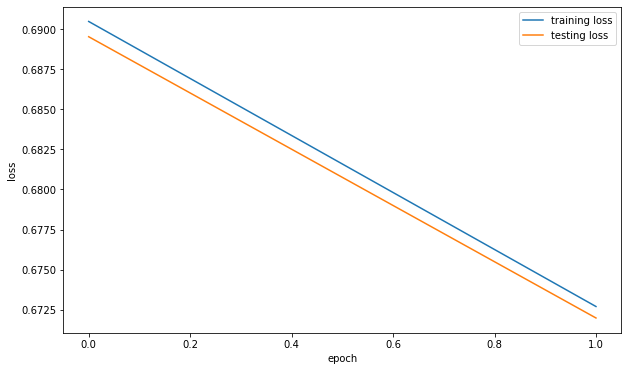

In [52]:
plot_loss_curve(training_loss_list, testing_loss_list)

#### 预测

接下来编写一个预测的函数，事实上，$\rm sigmoid$输出的是当前这个样本为正例的概率，也就是说，这个输出值是一个0到1的值，一般我们将大于0.5的值变成1，小于0.5的值变成0，也就是说，如果当前输出的概率值大于0.5，那我们认为这个样本的类别就是1，否则就是0，这样输出的就是类标了。

In [53]:
def predict_logestics(X, W, b):
    '''
    预测，调用forward函数完成神经网络对输入X的计算，然后完成类别的划分，大于0.5的变为1，小于等于0.5的变为0
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m), 训练集
    
    W: np.ndarray, shape = (m, 1)，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    Returns
    ----------
    prediction: np.ndarray, shape = (n, 1)，预测的标记
    
    '''
    
    prediction = np.where(forward_logesitcs(X, W, b) > 0.5, 1, 0)
    return prediction

#### 训练一个神经网络

In [60]:
from sklearn.metrics import accuracy_score
W, b = initialize(x_train.shape[1])
training_loss_list, testing_loss_list = train_logestics(x_train, y_train, x_test, y_test, W, b, 10000, 0.0001)

prediction = predict_logestics(x_test, W, b)
accuracy_score(y_test, prediction)  # 0.967032967032967

0.9560439560439561

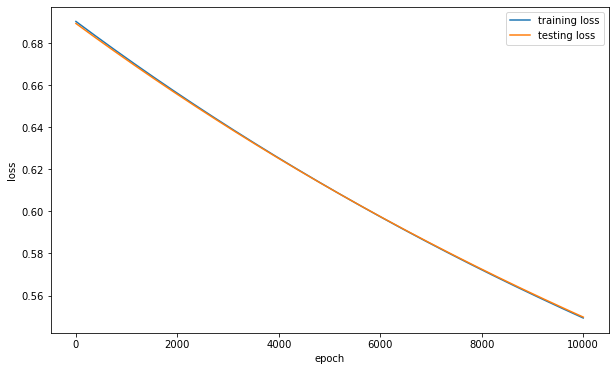

In [61]:
plot_loss_curve(training_loss_list, testing_loss_list)

#### test：初始化新的参数，学习率和迭代轮数按下表设置，绘制其训练集和测试集损失值的变化曲线，完成表格内精度的填写

lr 0.001 epoch 200 test_acc 0.8772893772893773
lr 0.1 epoch 1000 test_acc 0.9908424908424909


学习率|迭代轮数|测试集精度
-|-|-
0.0001|200|0.8772893772893773
0.1|1000|0.9908424908424909

In [62]:
from sklearn.metrics import accuracy_score

def train_test_log(lr, epoch, x_train, y_train, x_test, y_test):
    W, b = initialize(x_train.shape[1])
    training_loss_list, testing_loss_list = train_logestics(x_train, y_train, x_test, y_test, W, b, epoch, lr)

    prediction = predict_logestics(x_test, W, b)
    acc = accuracy_score(y_test, prediction)  # 0.967032967032967
    plot_loss_curve(training_loss_list, testing_loss_list)
    plt.title('lr'+str(lr)+' epoch'+str(epoch))
    print('lr', lr, 'epoch', epoch, 'test_acc', acc)

lr 0.001 epoch 200 test_acc 0.8772893772893773
lr 0.1 epoch 1000 test_acc 0.9908424908424909


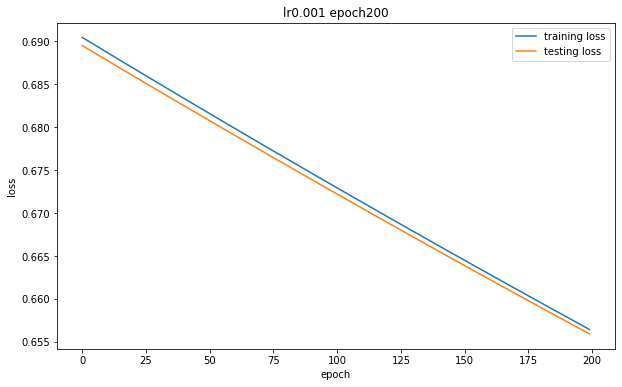

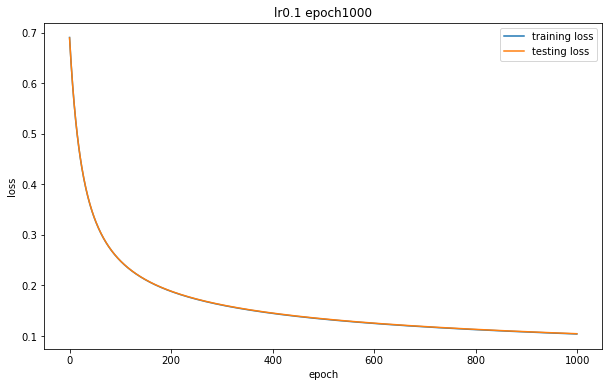

In [64]:
lr_epoch_ls = [[0.001, 200], [0.1, 1000]]
for lr, epoch in lr_epoch_ls:
    train_test_log(lr, epoch, x_train, y_train, x_test, y_test)

# 手动实现三层感知机——多分类

见另外一个文件：1006实验课(续).ipynb